# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{weather_api_key}&q={city.replace(' ', '+')}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | mandal
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | minas de marcona
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | noosa heads
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | zyryanovsk
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | fale old settlement
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | sanctuary point
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | benjamin aceval
Processing Record 21 of Set 1 | lebu
Processing Record 22

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,28.53,79,11,4.50,TK,1746951356
1,isafjordur,66.0755,-23.1240,2.02,60,0,1.54,IS,1746951357
2,mandal,25.4500,74.5667,37.51,24,4,3.70,IN,1746951358
3,cabo san lucas,22.8909,-109.9124,22.96,51,44,5.07,MX,1746951359
4,minas de marcona,-15.2119,-75.1103,13.19,88,18,3.34,PE,1746951360


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.53,79,11,4.50,TK,1746951356
1,isafjordur,66.0755,-23.1240,2.02,60,0,1.54,IS,1746951357
2,mandal,25.4500,74.5667,37.51,24,4,3.70,IN,1746951358
3,cabo san lucas,22.8909,-109.9124,22.96,51,44,5.07,MX,1746951359
4,minas de marcona,-15.2119,-75.1103,13.19,88,18,3.34,PE,1746951360


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

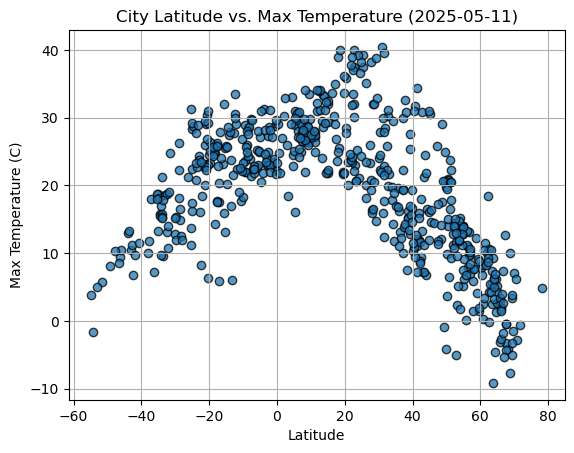

In [16]:
# Build scatter plot for latitude vs. temperature

# Import the date object
from datetime import date 
today = date.today().strftime("%Y-%m-%d")

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

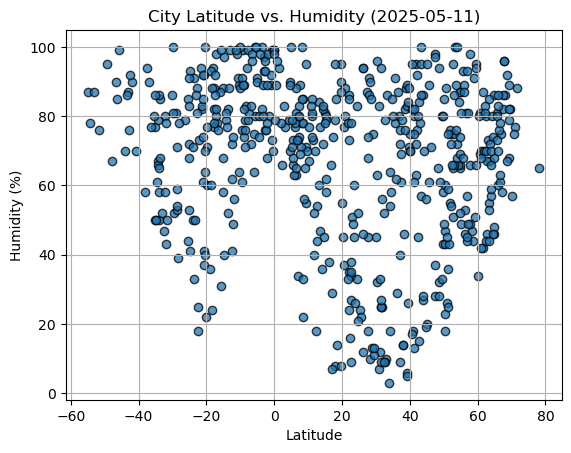

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

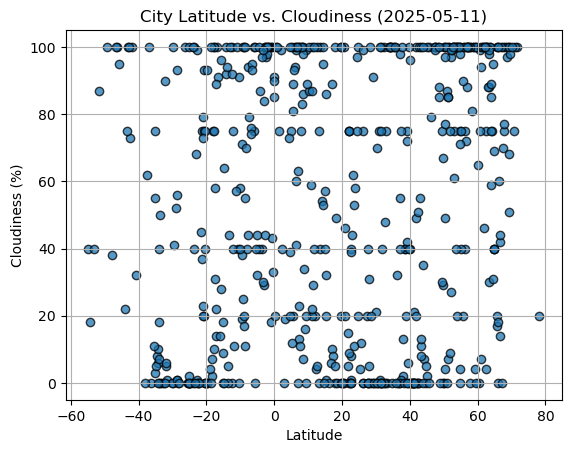

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

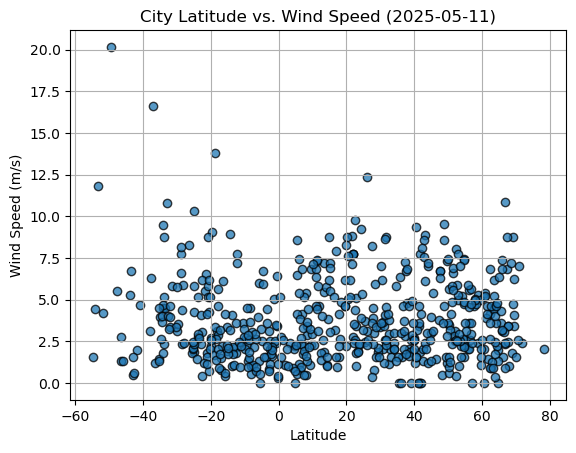

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,isafjordur,66.0755,-23.1240,2.02,60,0,1.54,IS,1746951357
2,mandal,25.4500,74.5667,37.51,24,4,3.70,IN,1746951358
3,cabo san lucas,22.8909,-109.9124,22.96,51,44,5.07,MX,1746951359
5,wailua homesteads,22.0669,-159.3780,23.44,86,75,7.72,US,1746951361
7,college,64.8569,-147.8028,5.09,46,40,1.34,US,1746951201


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.53,79,11,4.50,TK,1746951356
4,minas de marcona,-15.2119,-75.1103,13.19,88,18,3.34,PE,1746951360
6,noosa heads,-26.3833,153.1500,21.28,79,100,8.27,AU,1746951362
10,port-aux-francais,-49.3500,70.2167,8.17,95,100,20.16,TF,1746951367
12,fale old settlement,-9.3852,-171.2468,28.98,76,71,4.51,TK,1746951369


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.652258781367184


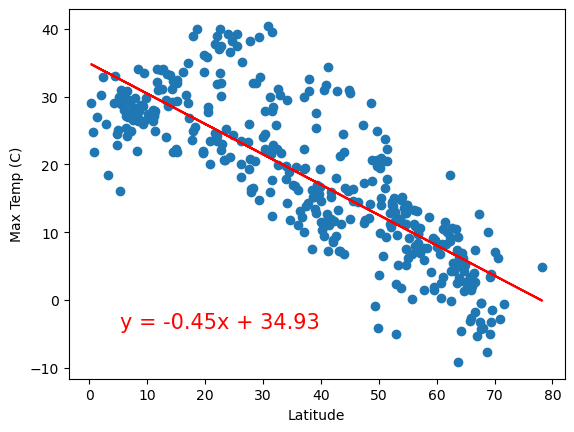

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Adjust annotation coordinates based on your plot output if needed
plt.annotate(line_eq,(min(x_values)+5,min(y_values)+5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue**2}") # The output shows r-squared
plt.show()

The r-value is: 0.4785893212799289


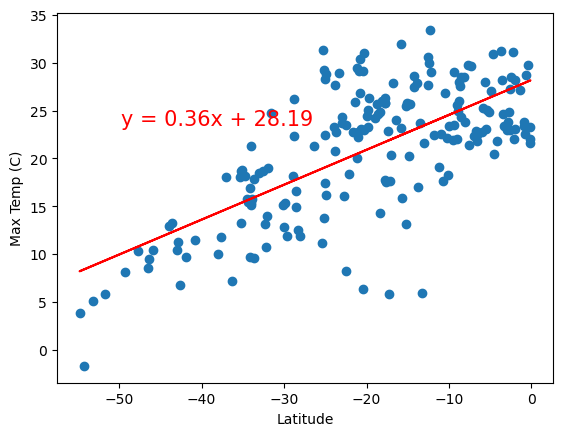

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Adjust annotation coordinates based on your plot output if needed
plt.annotate(line_eq,(min(x_values)+5,max(y_values)-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is typically a strong negative correlation between latitude and maximum temperature. As the latitude increases (moving further north, away from the equator), the maximum temperature tends to decrease. The r-value (or r-squared value) from the regression will quantify the strength of this linear relationship; a value close to 1 (for r-squared) indicates a strong correlation.

In the Southern Hemisphere, there is generally a strong positive correlation between latitude and maximum temperature. As latitude increases (moving from more negative values closer to 0, i.e., towards the equator), the maximum temperature tends to increase. The r-value will indicate how well the linear model fits this relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.003124097172548475


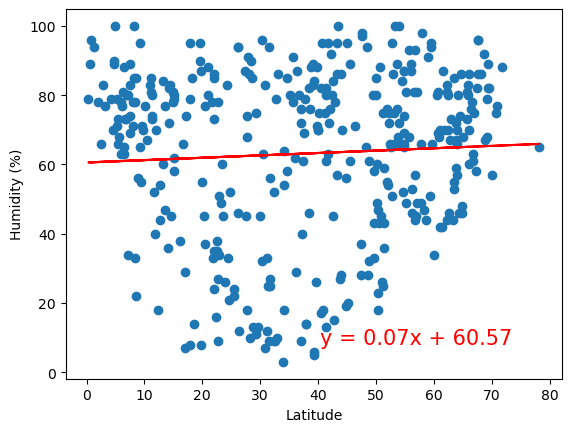

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+40,min(y_values)+5),fontsize=15,color="red") # Adjust coordinates as needed
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.04190407011622348


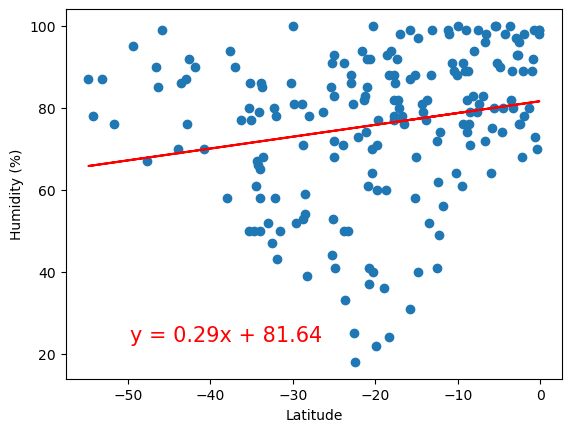

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+5,min(y_values)+5),fontsize=15,color="red") # Adjust coordinates
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and humidity in the Northern Hemisphere is often weak or variable. The scatter plot might show a wide distribution of humidity levels across different latitudes, and the r-value is typically low, indicating a poor linear correlation. Other factors like proximity to large bodies of water, wind patterns, and local geography play a more significant role in determining humidity.

Similar to the Northern Hemisphere, the Southern Hemisphere often shows a weak linear relationship between latitude and humidity. The r-value is generally low, suggesting that latitude is not a strong predictor of humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03506389232593098


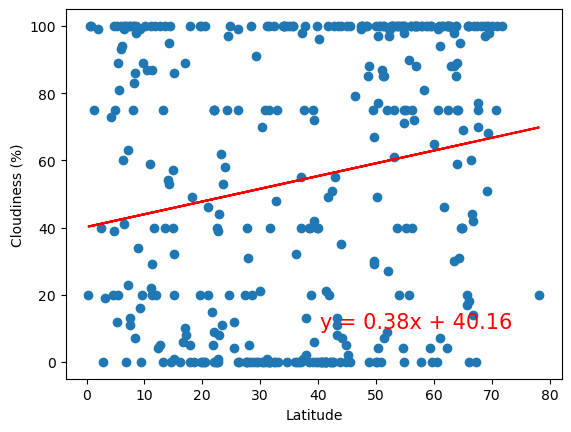

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+40,min(y_values)+10),fontsize=15,color="red") # Adjust
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.05253991626033412


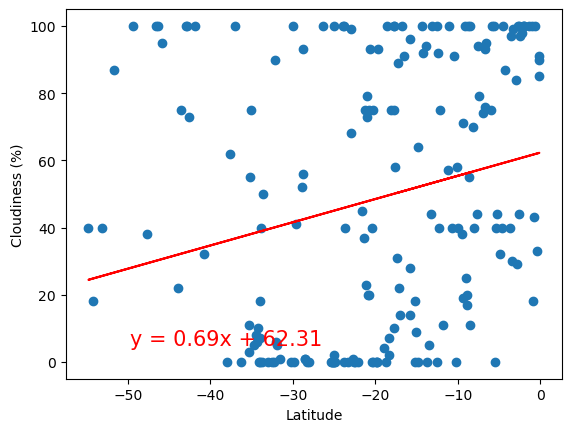

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+5,min(y_values)+5),fontsize=15,color="red") # Adjust
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** Cloudiness and latitude typically exhibit a very weak or no discernible linear correlation in the Northern Hemisphere. Cloud cover is influenced by complex atmospheric dynamics, pressure systems, and local conditions, making latitude a poor predictor. The r-value is expected to be very low.

Similar to the Northern Hemisphere, the relationship between cloudiness and latitude in the Southern Hemisphere is generally very weak. The data points are often scattered widely, and the r-value will likely be close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00016995258618150325


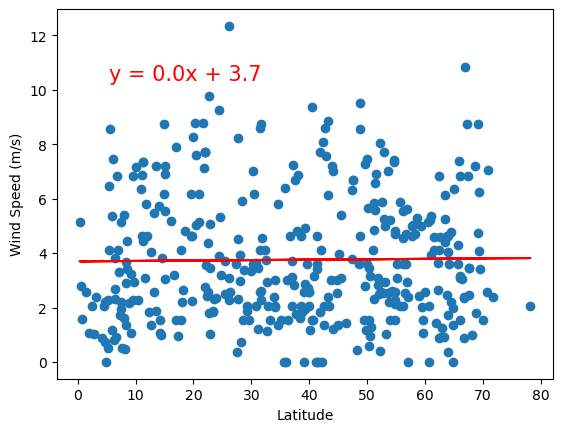

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+5,max(y_values)-2),fontsize=15,color="red") # Adjust
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.10039759771978683


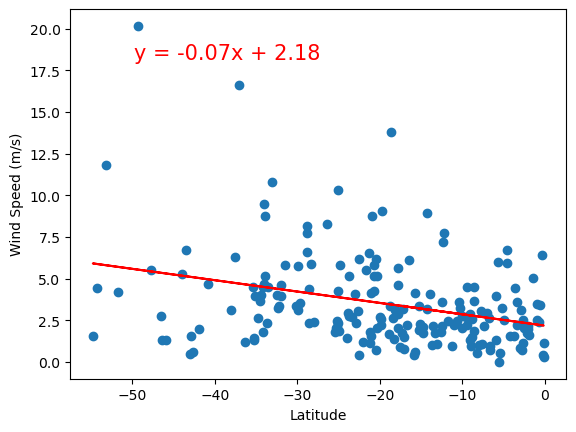

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+5,max(y_values)-2),fontsize=15,color="red") # Adjust
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The relationship between wind speed and latitude in the Northern Hemisphere tends to be weak. While some general atmospheric circulation patterns might suggest slightly higher average wind speeds at higher latitudes (e.g., due to the jet stream), local topography and pressure systems have a more dominant effect. The r-value is often low.

Similar to the Northern Hemisphere, wind speed and latitude in the Southern Hemisphere generally show a weak linear correlation. The r-value is expected to be low, as wind speed is primarily influenced by factors other than just latitude.